## Using the distance matricies I created in [the distance API notebook](http://localhost:8888/notebooks/Desktop/CapstoneMSGT/Notebooks/TestinBingAPI.ipynb) to try MDS.

[]

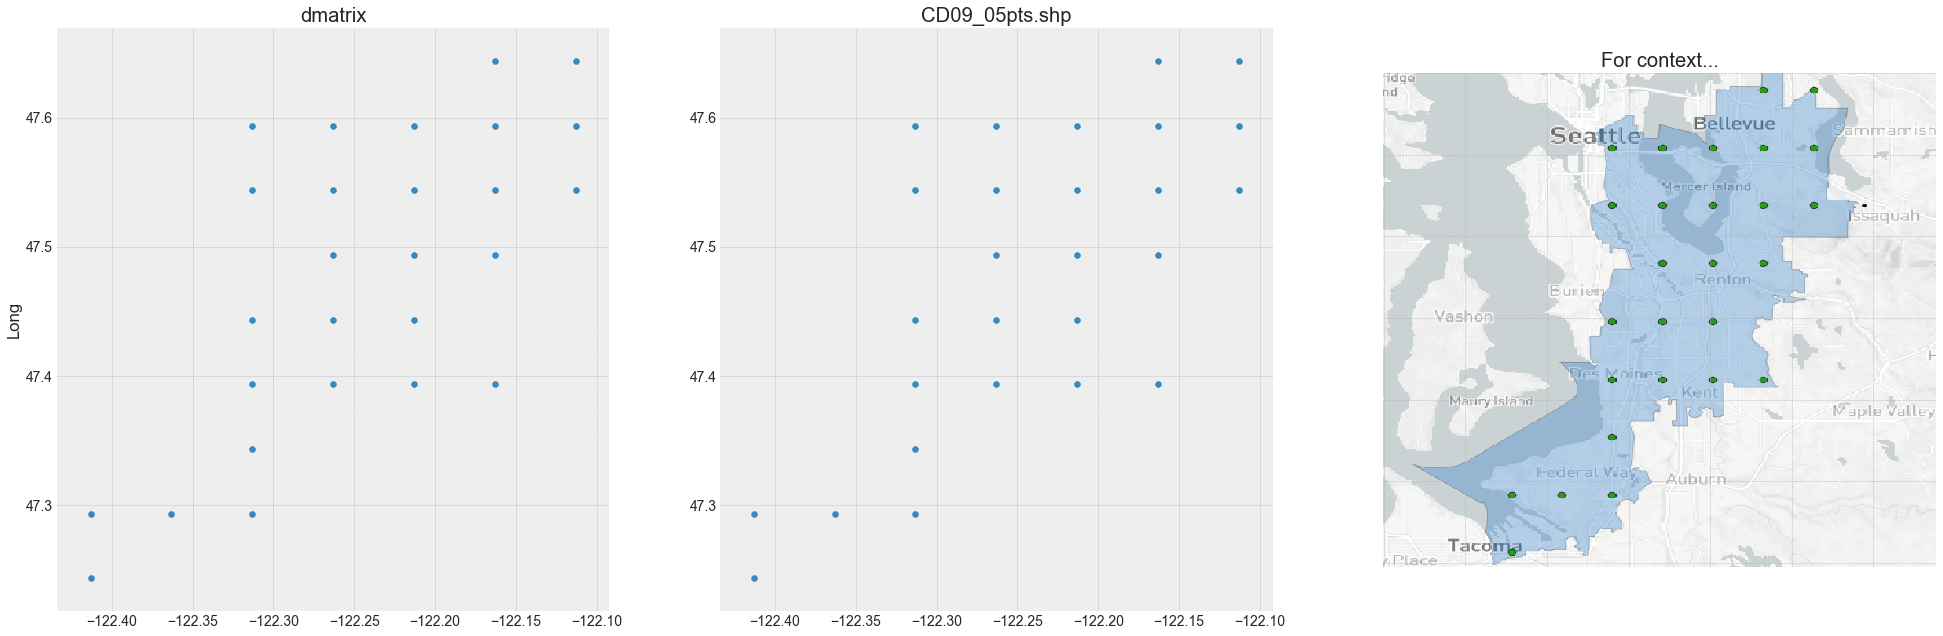

In [105]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from sklearn import manifold

#queue up the distance matrix from the distance API notebook.
dmatrix = pd.read_pickle('Shapes/09/CD09_05dmx.pkl')

#create a list of points from the df header to plot
geopoints = list(dmatrix)

#plot the points from the dmatrix headings
lat = []
long = []
for point in geopoints:
    long.append(point[0])
    lat.append(point[1])
    
#compare to the shapefile (can never be too careful...)
pts = 'Shapes/09/CD09_05pts.shp'
#poly = 'Shapes/09/CD113FP_09.shp'
CD_grid = gpd.read_file(pts)
#CD_shape = gpd.read_file(poly)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])
ax1.scatter(lat,long)
ax1.set_title('dmatrix')
ax1.set_ylabel('Lat')
ax1.set_xlabel('Long')

CD_grid.plot(ax=ax2)
ax2.set_title('CD09_05pts.shp')

img = plt.imread('Shapes/09/cd09.png')
ax3.imshow(img)
ax3.set_title('For context...')
ax3.set_yticklabels([])
ax3.set_xticklabels([])
